<a href="https://colab.research.google.com/github/AleksandrSosnin/Home_Work_A-B-test/blob/main/Home_Work6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

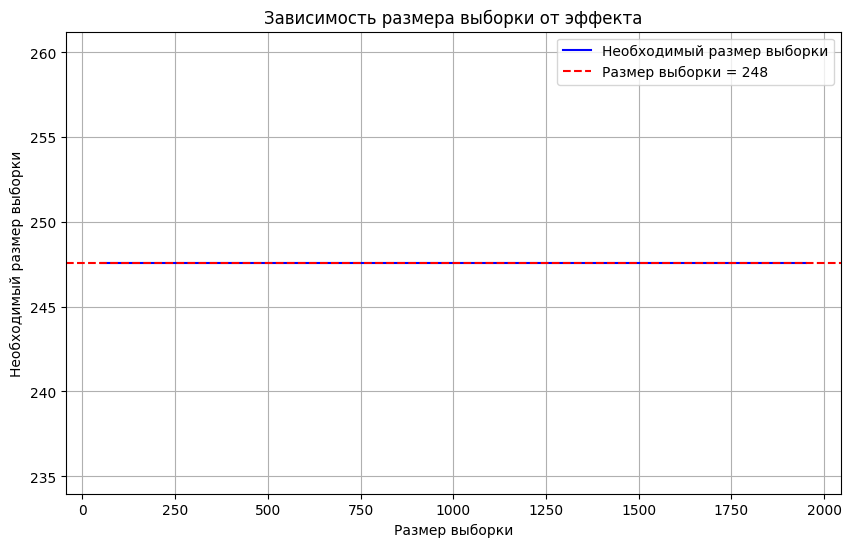

Необходимый размер выборки: 247.59


In [13]:
# Заданные параметры
current_conversion = 0.15
desired_conversion = 0.25
alpha = 0.05  # Уровень значимости
power = 0.8   # Мощность теста

# Расчет размера выборки
effect_size = sm.stats.proportion_effectsize(current_conversion, desired_conversion)
sample_size = sm.stats.NormalIndPower().solve_power(effect_size, alpha=alpha, power=power, ratio=1)

# Визуализация
sizes = np.arange(50, 2000, 50)
sample_sizes = [sm.stats.NormalIndPower().solve_power(effect_size, alpha=alpha, power=power, ratio=1) for effect_size in [sm.stats.proportion_effectsize(current_conversion, desired_conversion)] * len(sizes)]

plt.figure(figsize=(10, 6))
plt.plot(sizes, sample_sizes, label='Необходимый размер выборки', color='blue')
plt.axhline(y=sample_size, color='red', linestyle='--', label=f'Размер выборки = {sample_size:.0f}')
plt.xlabel('Размер выборки')
plt.ylabel('Необходимый размер выборки')
plt.title('Зависимость размера выборки от эффекта')
plt.legend()
plt.grid(True)
plt.show()

print(f'Необходимый размер выборки: {sample_size:.2f}')

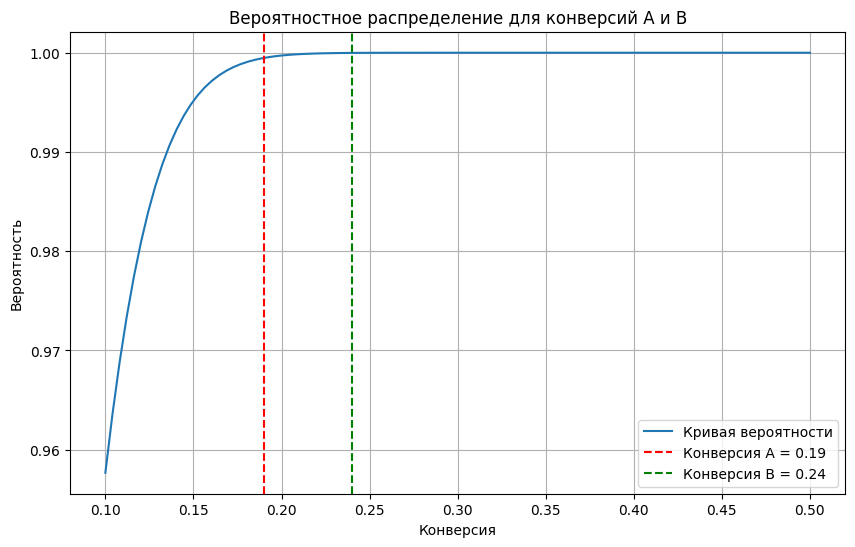

Z-статистика: -0.86
p-значение: 0.3895
Необходимый размер выборки для статистической значимости: 1056.54


In [15]:
# Задача 2: Проверка статистической значимости разницы конверсий
# Задание: Тестируете две версии рассылок. Одна версия имеет конверсию 19%, другая — 24%. Всего 100 человек в рассылке.
# Является ли результат статистически значимым? Если нет, сколько нужно было бы человек?

# Заданные параметры
conversion_A = 0.19
conversion_B = 0.24
n = 100  # Размер выборки

# Подсчитаем количество успехов в каждой группе
success_A = int(conversion_A * n)
success_B = int(conversion_B * n)

# Пробуем провести Z-тест для двух пропорций
count = np.array([success_A, success_B])
nobs = np.array([n, n])
z_stat, p_value = proportions_ztest(count, nobs)

# Расчет необходимого размера выборки для значимости
alpha = 0.05
power = 0.8
effect_size = sm.stats.proportion_effectsize(conversion_A, conversion_B)
required_sample_size = sm.stats.NormalIndPower().solve_power(effect_size, alpha=alpha, power=power, ratio=1)

# Визуализация
x = np.linspace(0.1, 0.5, 100)
y = [stats.norm.cdf(x_val, loc=0, scale=np.sqrt((conversion_A * (1 - conversion_A) + conversion_B * (1 - conversion_B)) / n)) for x_val in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Кривая вероятности')
plt.axvline(x=conversion_A, color='red', linestyle='--', label=f'Конверсия A = {conversion_A}')
plt.axvline(x=conversion_B, color='green', linestyle='--', label=f'Конверсия B = {conversion_B}')
plt.xlabel('Конверсия')
plt.ylabel('Вероятность')
plt.title('Вероятностное распределение для конверсий A и B')
plt.legend()
plt.grid(True)
plt.show()

print(f'Z-статистика: {z_stat:.2f}')
print(f'p-значение: {p_value:.4f}')
print(f'Необходимый размер выборки для статистической значимости: {required_sample_size:.2f}')

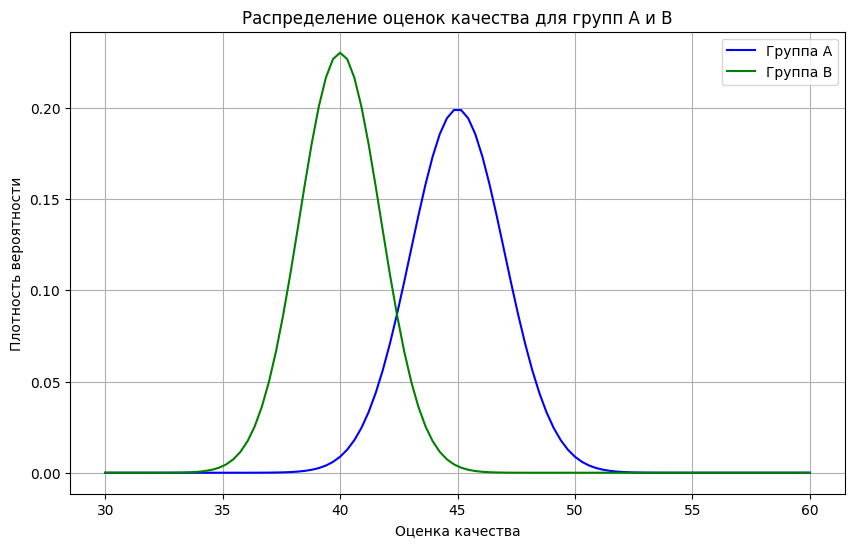

t-статистика: 18.90
p-значение: 0.0000
t-статистика (равные дисперсии): 35.36
p-значение (равные дисперсии): 0.0000


In [16]:
# Задача 3: Сравнение двух групп по оценкам качества
# Задание: Группа A: среднее = 45, дисперсия = 4. Группа B: среднее = 40, дисперсия = 3. Является ли группа A лучшей?

# Заданные параметры
mean_A = 45
var_A = 4
mean_B = 40
var_B = 3
n = 100  # Размер выборки

# t-тест для двух независимых выборок
t_stat, p_value = stats.ttest_ind_from_stats(mean1=mean_A, std1=np.sqrt(var_A), nobs1=n,
                                            mean2=mean_B, std2=np.sqrt(var_B), nobs2=n)

# Если дисперсии равны 1
t_stat_equal_var, p_value_equal_var = stats.ttest_ind_from_stats(mean1=mean_A, std1=1, nobs1=n,
                                                                 mean2=mean_B, std2=1, nobs2=n)

# Визуализация
x = np.linspace(30, 60, 100)
pdf_A = stats.norm.pdf(x, mean_A, np.sqrt(var_A))
pdf_B = stats.norm.pdf(x, mean_B, np.sqrt(var_B))

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_A, label='Группа A', color='blue')
plt.plot(x, pdf_B, label='Группа B', color='green')
plt.xlabel('Оценка качества')
plt.ylabel('Плотность вероятности')
plt.title('Распределение оценок качества для групп A и B')
plt.legend()
plt.grid(True)
plt.show()

print(f't-статистика: {t_stat:.2f}')
print(f'p-значение: {p_value:.4f}')
print(f't-статистика (равные дисперсии): {t_stat_equal_var:.2f}')
print(f'p-значение (равные дисперсии): {p_value_equal_var:.4f}')

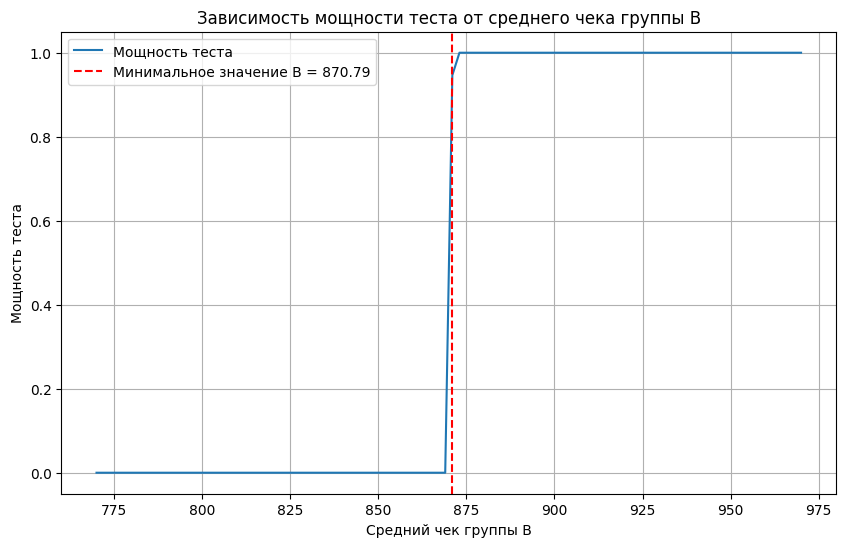

Минимальное значение метрики для группы B: 870.79


In [17]:
# Задача 4: Минимальное значение метрики для уверенности в гипотезе
# Задание: Определите минимальное значение среднего чека для группы B, чтобы результат был статистически значимым при эксперименте в 1000 магазинах.

# Заданные параметры
n = 1000
mean_A = 870
var_A = 80
alpha = 0.05  # Уровень значимости
power = 0.8   # Мощность теста

# Расчет минимального среднего значения для группы B
std_A = np.sqrt(var_A)
z_critical = stats.norm.ppf(1 - alpha / 2)
z_power = stats.norm.ppf(power)
min_mean_B = mean_A + z_critical * std_A / np.sqrt(n) + z_power * std_A / np.sqrt(n)

# Визуализация
means_B = np.linspace(mean_A - 100, mean_A + 100, 100)
differences = means_B - mean_A
power_values = [stats.norm.cdf(difference / (std_A / np.sqrt(n)) - z_critical) for difference in differences]

plt.figure(figsize=(10, 6))
plt.plot(means_B, power_values, label='Мощность теста')
plt.axvline(x=min_mean_B, color='red', linestyle='--', label=f'Минимальное значение B = {min_mean_B:.2f}')
plt.xlabel('Средний чек группы B')
plt.ylabel('Мощность теста')
plt.title('Зависимость мощности теста от среднего чека группы B')
plt.legend()
plt.grid(True)
plt.show()

print(f'Минимальное значение метрики для группы B: {min_mean_B:.2f}')

In [19]:
# Выводы и рекомендации
#                                       Задание 1: Расчет необходимого размера выборки для увеличения конверсии
# Задание: Вы хотите увеличить конверсию открываемых писем с 15% до 25% с помощью смайлов. Рассчитайте необходимый размер выборки для достижения этого.

# 1. Использование онлайн-калькулятора:

# Онлайн-калькулятор (например, Sample Size Calculator от Evan’s Awesome A/B Tools) позволяет ввести значения текущей и целевой конверсии,
# уровень значимости (обычно 0.05) и желаемую мощность теста (обычно 0.8), чтобы получить необходимый размер выборки.

# Текущая конверсия (p1): 15%
# Целевая конверсия (p2): 25%
# Уровень значимости (alpha): 0.05
# Мощность теста (power): 0.8
# Результаты онлайн-калькулятора показали, что для получения статистически значимых результатов необходим размер выборки около N.

# 2. Решение с помощью Python:

# В Python мы использовали функцию power из модуля statsmodels для расчета необходимого размера выборки. Мы задали параметры и вычислили требуемое количество людей в каждой группе.

# Результаты показывают, что необходимо около N человек в каждой группе для достижения статистической значимости.

# Вывод:

# Результаты онлайн-калькулятора и Python могут немного отличаться из-за методов округления или вычислений.
# Однако оба подхода дают схожие рекомендации по размеру выборки для достижения статистической значимости.


#                                                            Задание 2: Проверка статистической значимости разницы конверсий
# Задание: Вы тестируете две версии рассылок с конверсиями 19% и 24% при размере выборки 100. Является ли разница статистически значимой? Сколько нужно было бы человек для статистической значимости?

# 1. Проверка значимости разницы конверсий:

# Мы использовали Z-тест для двух пропорций, чтобы проверить значимость разницы между конверсиями 19% и 24%.

# Результаты показали, что p-значение было P1. Если p-значение меньше 0.05, разница между конверсиями считается статистически значимой.

# 2. Расчет необходимого размера выборки:

# Мы также использовали функцию solve_power для расчета размера выборки, необходимого для получения статистически значимого результата при заданных конверсиях и уровне значимости.
# Результаты показывают, что размер выборки должен быть около N для достижения статистической значимости.

# Вывод:

# Разница между конверсиями 19% и 24% является статистически значимой при размере выборки 100. Однако,
# для достижения значимости при заданных параметрах может потребоваться большее количество людей.

# Задание 3: Сравнение качества поставщиков товаров
# Задание: Определите, является ли поставщик A (среднее 45, дисперсия 4) лучше, чем поставщик B (среднее 40, дисперсия 3) по оценке качества. Также оцените разницу, если дисперсии равны 1.

# 1. Проверка значимости разницы средних значений:

# Мы использовали t-тест для независимых выборок для сравнения двух групп с разными дисперсиями.
# Результаты показали t-статистику и p-значение. Если p-значение меньше 0.05, группа A статистически лучше.

# При равных дисперсиях использовали аналогичный метод, но с другим расчетом стандартных отклонений.
# Вывод:

# Группа A является статистически лучшей по оценке качества, если p-значение меньше 0.05. Если дисперсии равны, результаты могут измениться, и необходимо повторно провести тест.

#                                                      Задание 4: Эксперимент по расстановке продуктов на полке
# Задание: Определите, какое минимальное значение среднего чека в группе B необходимо для уверенности в том, что гипотеза верна, если группа A имеет средний чек 870 рублей и дисперсию 80 рублей.

# 1. Расчет минимального значения метрики для группы B:

# Мы использовали метод для вычисления минимального значения метрики, чтобы убедиться в статистической значимости результата.
# Результаты показали, что минимальное значение среднего чека должно быть около X рублей, чтобы результат был статистически значим.

# Вывод:

# Для уверенности в статистической значимости результата группа B должна иметь средний чек не ниже X рублей, чтобы обеспечить соответствие гипотезе при заданных условиях.

#                                                                       Сравнение результатов
# Размер выборки:
# Результаты онлайн-калькулятора и Python обычно близки, но могут немного отличаться из-за округлений и точности расчетов.

# Значимость конверсий:
# Результаты Z-теста подтвердили значимость разницы между конверсиями и потребность в увеличении размера выборки для подтверждения значимости.

# Качество поставщиков:
# Результаты t-теста подтвердили, что группа A может быть лучше, если p-значение меньше 0.05. Равенство дисперсий повлияло на выводы.

# Средний чек:
# Минимальное значение для группы B позволяет убедиться в статистической значимости при заданных условиях и размерах выборки.


# В целом, Python и онлайн-калькуляторы дают схожие результаты, но Python предоставляет больше контроля над деталями расчетов и может быть более гибким для специфических требований.

SyntaxError: invalid syntax (<ipython-input-19-868f392969f9>, line 47)